# Data Analysis Framework for Photographic Collection Data from the KHI

Introductory text

## Notebook introduction

Text content

## Table of content

Table of content

## 0. Preparation

In [1]:
!pip install pathlib
!pip install numpy
!pip install matplotlib
!pip install pandas
%load_ext autoreload
%autoreload 2

Index(['11H(Ephrem of Syria)0', '11H(Jerome)0', '11F61', '11G21',
       '11HH(Catherine)0', '11H(Dominic)0', '11H(Francis)0',
       '11H(Antony Abbot)0', '11H(Paul)0', '11H(Peter)0',
       '11HH(Mary Magdalene)0', '11H(Augustine)0', '73A521', '11F4222(+3)',
       '11H(Johannes Colombini)', '11D322', '73A53', '11H(Cosmas and Damian)0',
       '11F41121', '23R110', '11H(Louis of Toulouse)0', '73B57',
       '11H(Jerome)51', '73C7211', '11HH(Mary Magdalene)'],
      dtype='object')


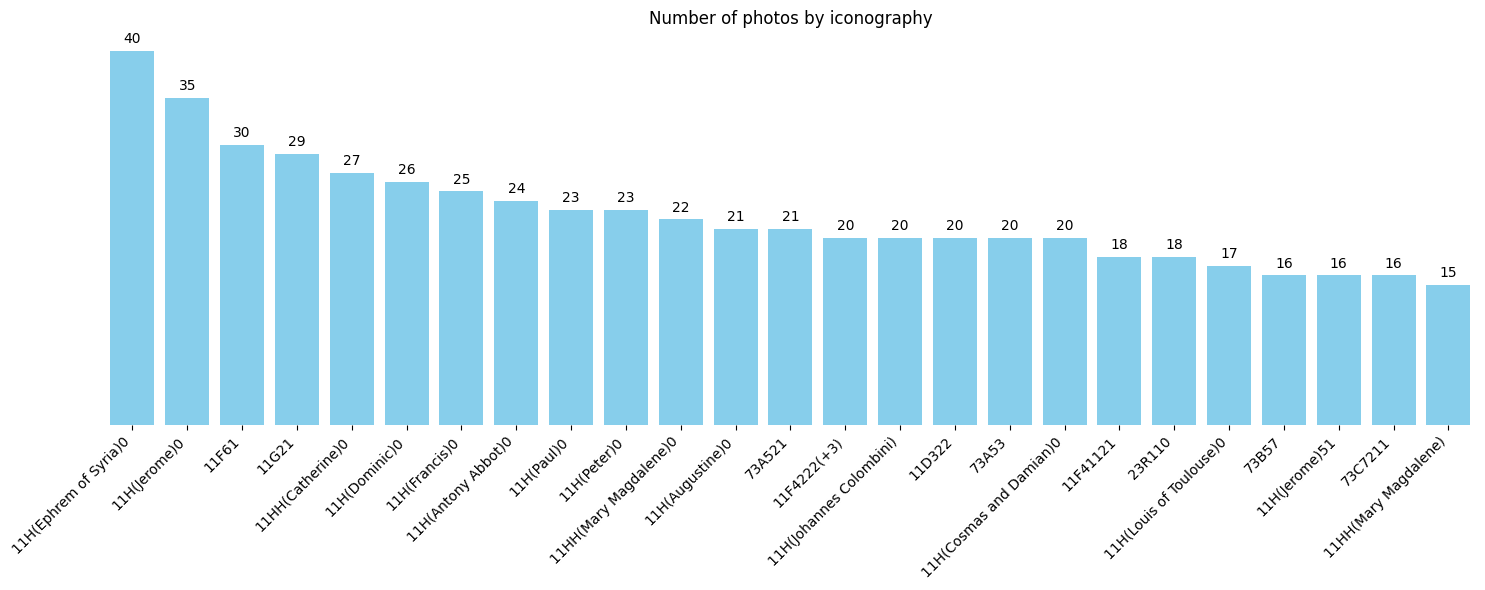

In [2]:
# To prevent SSL certificate failure
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
import pathlib
import xml.etree.ElementTree as ET
import re
from pprint import pprint
from resources.PhotoAttributes import PhotoAttributes
from resources.dictionaries_file import *
from resources.Classes_file import *
from Thesis_project_main import *
import numpy
import ipywidgets as widgets
import codecs
from module import *
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [3]:
%run ./resources/dataclasses_creation.py

## Upload your KHI dataset

This section allows you to **upload your XML file** containing data about the collections of the KHI. Click on the upload button to upload the file in XML format from your device. Beware that executing the cell by pressing Shift+Enter will remove your upload.

In [4]:
display(upload)

FileUpload(value=(), accept='.xml', description='Upload')

Execute the following cell by pressing Shift+Enter to decode your data and save the content in a text file.

In [6]:
try:
    uploaded_file = upload.value[0]
    codecs.decode(uploaded_file.content, encoding="windows-1252")
except IndexError:
    print("Please upload an XML file in the cell above")

with open("./saved-output.txt", "wb") as fp:
    fp.write(uploaded_file.content)

### Extract Data

Execute the following cell to get an overview of your dataset. The data is presented within a **DataFrame**, a data structure used in computer programming and data analysis to organize and manipulate tabular data, especially when working with large datasets. Each **row** represents an individual entry, like a record in a database, and each **column** represents a specific type of information.

DataFrames let you organize, explore, and manipulate data easily, allowing tasks such as **filtering**, **sorting**, and **summarizing data**. You can also perform statistical analysis, create visualizations, and prepare data for machine learning models using DataFrames in Python and other programming languages. 

In [7]:
photos_collection = XmlReaderKHI.get_dataframe("./saved-output.txt")

# The dataframe "photos_dataframe" also includes entries of the photographs' digital version. 
photos_dataframe = photos_collection.dataframe

# The dataframe "photos_dataframe_no_scan" does not contain entries of digital photos of the so-called "Cimelia" photographs.
# It is the best option to obtain more accurate results if you are not interested in including data about the digital versions 
# of these photographs in your results.
photos_dataframe_no_scan = photos_collection.dataframe_no_scan
photos_dataframe_no_scan

,obj_id,obj_id_level2,obj_id_level3,artist,other_artist_attribution,date,title,description_khi,status,genre,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_literature_citation,photo_file_number,photo_credit_line,photo_old_archival_section,photo_preservation_status
0,70010647,None,None,[Tizian],None,[Datierung: um 1514],Noli me tangere,None,None,Malerei,...,None,None,"[25,2 x 19,2 cm (Druck)]",Gesamtansicht,None,None,None,None,None,None
1,07705412,None,None,"[Basaiti, Marco]",None,None,Berufung der Söhne des Zebedäus,None,None,Tafelmalerei,...,None,None,"[26,1 x 16,5 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
3,07705412,None,None,"[Basaiti, Marco]",None,None,Berufung der Söhne des Zebedäus,None,None,Tafelmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
4,07705412,None,None,"[Basaiti, Marco]",None,None,Berufung der Söhne des Zebedäus,None,None,Tafelmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
5,70013046,None,None,"[Lotto, Lorenzo]",None,[Datierung: 1527/1533],Maria mit dem Kind und den heiligen Katharina ...,None,None,Malerei,...,None,None,"[19,7 x 24,9 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,70012001,None,None,"[Gaulli, Giovanni Battista]",None,[Datierung: 1651/1700],Christuskind auf Wolken,None,None,Malerei,...,None,None,"[25,1 x 19,7 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
1118,70013060,None,None,"[Morone, Francesco (1471)]",None,[Datierung: um 1526],Maria mit Kind,None,None,Malerei,...,None,None,"[24,2 x 20,2 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
1120,70013210,None,None,"[Vaga, Perino del]",None,None,Die Geschichte von Amor und Psyche,None,None,Wandmalerei,...,None,None,[20 x 26 cm (Foto)],Gesamtansicht: Die Haushälterin der Räuber erz...,None,None,None,None,None,None
1122,70013210,None,None,"[Vaga, Perino del]",None,None,Die Geschichte von Amor und Psyche,None,None,Wandmalerei,...,None,None,None,Gesamtansicht: Die Haushälterin der Räuber erz...,None,None,None,None,None,None


### Dataset Information

Execute the following cell to see a short description of your dataset.

In [8]:
print(photos_collection.get_dataset_description())

About this dataset:
Number of photos: 853
Number of objects: 219


## Filter photograph dataset

DataFrames are a powerful data structure, allowing to easily manipulate and filter data. In this section, you can filter the data by specifying a search text and the column in which you want to perform the search. Please note that the dataset is in German.

### Filter by any column

Choose the column you want to filter from the menu below and write an input text to search in the dedicated field:

In [9]:
filter_column_widget.options=[column for column in photos_collection.dataframe_no_scan.columns if column != 'date']
filter_column_widget.value=photos_collection.dataframe_no_scan.columns[0]

In [10]:
display(filter_column_widget)
display(text_to_filter)
filter_by_column = photos_collection.filter_by(filter_column_widget.value, text_to_filter.value)
filter_by_column

Dropdown(description='Column:', options=('obj_id', 'obj_id_level2', 'obj_id_level3', 'artist', 'other_artist_a…

Text(value='', description='Search text:', placeholder='Type your text here')

,obj_id,obj_id_level2,obj_id_level3,artist,other_artist_attribution,date,title,description_khi,status,genre,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_literature_citation,photo_file_number,photo_credit_line,photo_old_archival_section,photo_preservation_status
0,70010647,None,None,[Tizian],None,[Datierung: um 1514],Noli me tangere,None,None,Malerei,...,None,None,"[25,2 x 19,2 cm (Druck)]",Gesamtansicht,None,None,None,None,None,None
1,07705412,None,None,"[Basaiti, Marco]",None,None,Berufung der Söhne des Zebedäus,None,None,Tafelmalerei,...,None,None,"[26,1 x 16,5 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
2,07705412,None,None,"[Basaiti, Marco]",None,None,Berufung der Söhne des Zebedäus,None,None,Tafelmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
3,07705412,None,None,"[Basaiti, Marco]",None,None,Berufung der Söhne des Zebedäus,None,None,Tafelmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
4,70013046,None,None,"[Lotto, Lorenzo]",None,[Datierung: 1527/1533],Maria mit dem Kind und den heiligen Katharina ...,None,None,Malerei,...,None,None,"[19,7 x 24,9 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,70012001,None,None,"[Gaulli, Giovanni Battista]",None,[Datierung: 1651/1700],Christuskind auf Wolken,None,None,Malerei,...,None,None,"[25,1 x 19,7 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
849,70013060,None,None,"[Morone, Francesco (1471)]",None,[Datierung: um 1526],Maria mit Kind,None,None,Malerei,...,None,None,"[24,2 x 20,2 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
850,70013210,None,None,"[Vaga, Perino del]",None,None,Die Geschichte von Amor und Psyche,None,None,Wandmalerei,...,None,None,[20 x 26 cm (Foto)],Gesamtansicht: Die Haushälterin der Räuber erz...,None,None,None,None,None,None
851,70013210,None,None,"[Vaga, Perino del]",None,None,Die Geschichte von Amor und Psyche,None,None,Wandmalerei,...,None,None,None,Gesamtansicht: Die Haushälterin der Räuber erz...,None,None,None,None,None,None


### Filter by date

Choose a date and an operator or two dates to filter photographs by dates related to the represented artwork.

In [11]:
display(text_date_to_filter, text_date_to_filter_2, year_operator)

Text(value='', description='Year:', placeholder='Type a year')

Text(value='', description='Year 2:', placeholder='Type a year (optional)')

Dropdown(description='Operator:', options=(('Choose an operator', ''), ('Match exact year', '='), ('Before', '…

In [12]:
filter_by_date = photos_collection.filter_by('date', '1400', '=')
filter_by_date

,obj_id,obj_id_level2,obj_id_level3,artist,other_artist_attribution,date,title,description_khi,status,genre,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_literature_citation,photo_file_number,photo_credit_line,photo_old_archival_section,photo_preservation_status
313,07650449,"07650449,T,001",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Dekoration des Triumphbogens,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Freskendekoration über dem Triumphbogen,None,None,fln0413005z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
314,07650449,"07650449,T,002",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Dekoration der südlichen Langhauswand,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Teilansicht: Fries und sternförmige Ornamente,None,None,fln0413006z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
315,07650449,"07650449,T,002",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Dekoration der südlichen Langhauswand,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Detail: Heilige Thomas,None,None,fln0594251z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
316,07650449,"07650449,T,002",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Dekoration der südlichen Langhauswand,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Detail: Heilige Matthäus,None,None,fln0594248z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
317,07650449,"07650449,T,002",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Dekoration der südlichen Langhauswand,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Detail: Apostel,None,None,flc0594894x_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
318,07650449,"07650449,T,002",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Dekoration der südlichen Langhauswand,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x9],Detail: Apostel,None,None,fln0594249z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
319,07650449,"07650449,T,002",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Dekoration der südlichen Langhauswand,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x9],Detail: Apostel,None,None,fln0594250z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
320,07650449,"07650449,T,003",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Westwand mit Darstellungen einer Schlacht zwis...,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Teilansicht: Schlachtenfries und obere Wandzone,None,None,fln0594243z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
321,07650449,"07650449,T,003",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Westwand mit Darstellungen einer Schlacht zwis...,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Teilansicht: Pilgerschiff und Kloster,None,None,flc0594896x_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
322,07650449,"07650449,T,003",None,[Meister der San Bevignate],None,"[Datierung: 1201/1300, Datierung: 1301/1400]",Westwand mit Darstellungen einer Schlacht zwis...,None,Fragment,Wandmalerei,...,tif,Scanner Imacon Flextight 848,[6x6],Detail: Schlacht,None,None,flc0594897x_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None


To search for a specific artist, replace the second value provided as argument in the brackets below.

In [13]:
filter_by_artist_name = photos_collection.filter_by('artist', 'sebastiano')
filter_by_artist_name

,obj_id,obj_id_level2,obj_id_level3,artist,other_artist_attribution,date,title,description_khi,status,genre,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_literature_citation,photo_file_number,photo_credit_line,photo_old_archival_section,photo_preservation_status
19,07700713,"07700713,T,001",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Heiliger Matthäus und Prophet Jesaja,None,None,Wandmalerei,...,None,None,None,Hl. Matthäus mit Jesaja,None,None,None,None,None,None
20,07700713,"07700713,T,002",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Verklärung Christi,None,None,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
21,07700713,"07700713,T,003",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Heiliger Petrus,None,None,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
22,07700713,"07700713,T,004",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Heiliger Franz von Assisi,None,None,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
23,07700713,"07700713,T,005",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Geißelung Christi,None,None,Wandmalerei,...,None,None,"[25,8 x 19,6 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
24,07700713,"07700713,T,005",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Geißelung Christi,None,None,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
574,70013128,None,None,"[Florigerio, Sebastiano]",None,None,Musikalische Unterhaltung,None,None,Malerei,...,None,None,"[21,4 x 27,9 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
575,70013128,None,None,"[Florigerio, Sebastiano]",None,None,Musikalische Unterhaltung,None,None,Malerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
576,70013128,None,None,"[Florigerio, Sebastiano]",None,None,Musikalische Unterhaltung,None,None,Malerei,...,None,None,None,Ausschnitt: Partitur,None,None,None,None,None,None
691,70013110,None,None,"[Conca, Sebastiano]",None,[Datierung: 1721/1724],Die Verklärung der heiligen Cäcilia,None,None,Deckenmalerei,...,None,None,"[26,12 x 20,1 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None


Replace the second value provided as argument in the brackets to filter photos by artwork title. You can provide one or multiple words (e.g. 'Madonna', 'Madonna mit Kind').

In [14]:
filter_by_title = photos_collection.filter_by(key='title', value='Madonna')
filter_by_title

,obj_id,obj_id_level2,obj_id_level3,artist,other_artist_attribution,date,title,description_khi,status,genre,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_literature_citation,photo_file_number,photo_credit_line,photo_old_archival_section,photo_preservation_status
43,07858122,None,None,[Correggio],None,[Datierung: um 1524],Madonna des heiligen Sebastian,None,None,Malerei,...,None,None,"[28,5 x 16,9 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
44,07858122,None,None,[Correggio],None,[Datierung: um 1524],Madonna des heiligen Sebastian,None,None,Malerei,...,None,None,None,Ausschnitt: Madonna mit Kind,None,None,None,None,None,None
45,07858122,None,None,[Correggio],None,[Datierung: um 1524],Madonna des heiligen Sebastian,None,None,Malerei,...,None,None,"[57,9 x 42,4 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
46,07858122,None,None,[Correggio],None,[Datierung: um 1524],Madonna des heiligen Sebastian,None,None,Malerei,...,None,None,"[57,9 x 42,1-42,3 cm (Foto)]",Ausschnitt: Madonna mit Kind,None,None,None,None,None,None
219,70013049,None,None,[Correggio],None,[Datierung: 1514/1515],Madonna des heiligen Franziskus,None,None,Malerei,...,None,None,"[25,4 x 20,2 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
220,70013049,None,None,[Correggio],None,[Datierung: 1514/1515],Madonna des heiligen Franziskus,None,None,Malerei,...,None,None,"[25,7 x 20,8 cm (Foto)]",Ausschnitt: Madonna mit Kind,None,None,None,None,None,None
221,70013049,None,None,[Correggio],None,[Datierung: 1514/1515],Madonna des heiligen Franziskus,None,None,Malerei,...,None,None,"[25,6 x 19,2 cm (Foto)]",Ausschnitt: Heiliger Franziskus,None,None,None,None,None,None
222,70013049,None,None,[Correggio],None,[Datierung: 1514/1515],Madonna des heiligen Franziskus,None,None,Malerei,...,None,None,"[25,5 x 19,6 cm (Foto)]",Ausschnitt: Putti,None,None,None,None,None,None
223,70013049,None,None,[Correggio],None,[Datierung: 1514/1515],Madonna des heiligen Franziskus,None,None,Malerei,...,None,None,None,Ausschnitt: Heilige,None,None,None,None,None,None
227,70013080,None,None,"[Moretto, Alessandro]",None,None,Thronende Madonna mit Kind und vier Kirchenvätern,None,None,Malerei,...,None,None,"[27,6 x 18,4 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None


In [15]:
filter_by_material= photos_collection.filter_by('material', 'Putz')
filter_by_material

,obj_id,obj_id_level2,obj_id_level3,artist,other_artist_attribution,date,title,description_khi,status,genre,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_literature_citation,photo_file_number,photo_credit_line,photo_old_archival_section,photo_preservation_status
18,07700713,"07700713,T,001",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Heiliger Matthäus und Prophet Jesaja,None,None,Wandmalerei,...,None,None,None,Hl. Matthäus mit Jesaja,None,None,None,None,None,None
19,07700713,"07700713,T,002",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Verklärung Christi,None,None,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
20,07700713,"07700713,T,003",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Heiliger Petrus,None,None,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
21,07700713,"07700713,T,004",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Heiliger Franz von Assisi,None,None,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
22,07700713,"07700713,T,005",None,[Sebastiano del Piombo],None,[Datierung: 1516/1524],Geißelung Christi,None,None,Wandmalerei,...,None,None,"[25,8 x 19,6 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,07703777,"07703777,T,003",None,"[Pontormo, Jacopo]",None,[Datierung: 1525-1528],Verkündigung,None,None,Wandmalerei,...,tif,Scanner Imacon Flextight 2848,[13x18],Maria,None,None,flc0539858z_p,Kunsthistorisches Institut in Florenz - Max-Pl...,None,None
675,70013029,None,None,"[Ricci, Sebastiano, Ricci, Marco]",None,[Datierung: 1718],Kopf der Samariterin,None,Fragment,Wandmalerei,...,None,None,"[20,4 x 19,1 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
676,70013029,None,None,"[Ricci, Sebastiano, Ricci, Marco]",None,[Datierung: 1718],Kopf der Samariterin,None,Fragment,Wandmalerei,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
703,70013210,None,None,"[Vaga, Perino del]",None,None,Die Geschichte von Amor und Psyche,None,None,Wandmalerei,...,None,None,[20 x 26 cm (Foto)],Gesamtansicht: Die Haushälterin der Räuber erz...,None,None,None,None,None,None


se vuoi fare un filtro multiplo per esempio usando il risultato di filter by artist name, fai cosi:


## Sort your data

Text

## Data visualization

To obtain a visualization of the data in your dataset, select a column to display its content and the type of chart you want to use. Beware that not all visualization methods are suitable depending on the selected data. Try to experiment with different visualizations to find the one that fits your data.

In [20]:
x_widget.options = photos_collection.dataframe_no_scan.columns
x_widget.value = photos_collection.dataframe_no_scan.columns[0]
display(x_widget, y_widget)

Dropdown(description='Key:', options=('obj_id', 'obj_id_level2', 'obj_id_level3', 'artist', 'other_artist_attr…

Dropdown(description='Plot type:', options=('bar', 'line', 'pie', 'histogram'), value='bar')

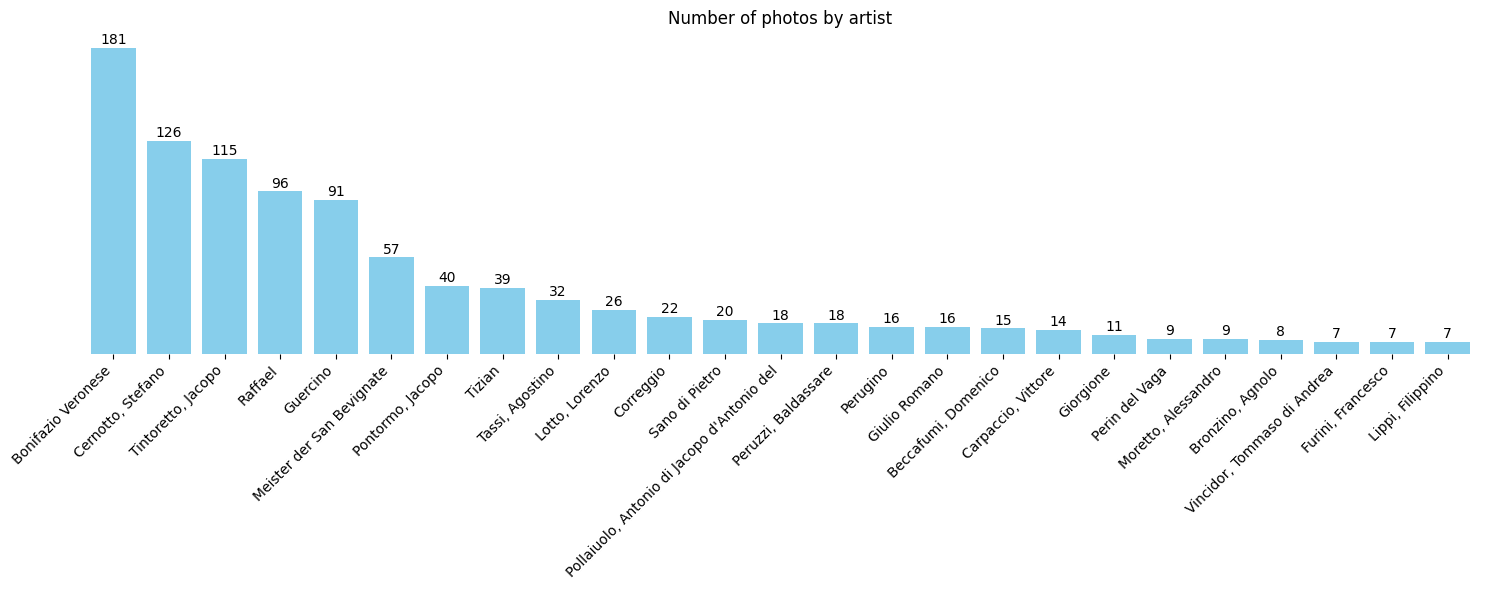

In [38]:
photos_collection.plot_values(x_widget.value, y_widget.value)

## Download results